<IPython.core.display.Javascript object>


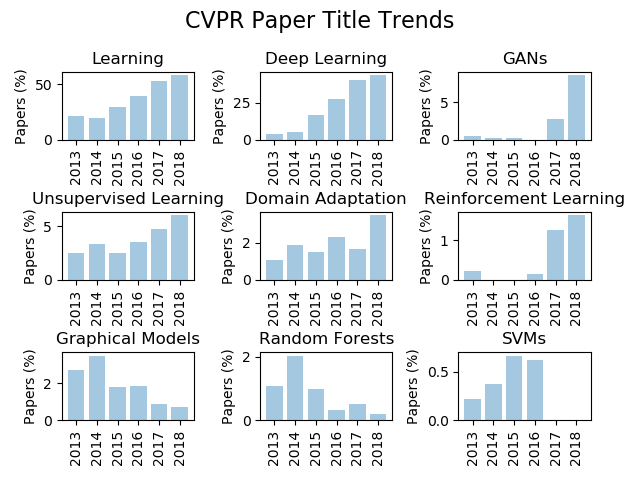

In [28]:
import re
import math

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

absolute = False # show absolute paper counts (if True) or percentage of papers (if False)

conference = "cvpr"
years = [2013, 2014, 2015, 2016, 2017, 2018]

#conference = "iccv"
#years = [2013, 2015, 2017]

# the popularity of topics is measured by matching the conference paper titles 
# against a list of key words associated with the topics, feel free to add topics and/or key words
topics = [
    {'name': 'Learning', 
         'keys': ['learn', 'train', 'forest', 'net', 'deep', 'neural', 'cnn', 'convolution', 'fcn', 'lstm', 'rnn', 'gan', 'adversarial']},
    {'name': 'Deep Learning', 
         'keys': ['net', 'deep', 'neural', 'cnn', 'convolution', 'fcn', 'lstm', 'rnn', 'gan', 'adversarial']},
    {'name': 'GANs', 
         'keys': ['gan', 'adversarial']},
    {'name': 'Unsupervised Learning', 
         'keys': ['unsupervised', 'semi-supervised', 'weakly supervised', 'self-supervised']},
    {'name': 'Domain Adaptation', 
         'keys': ['domain', 'transfer learning']},
    {'name': 'Reinforcement Learning', 
         'keys': ['reinforcement', 'agent', 'policy', 'q-learning', 'actor-critic', 'reward']},
    {'name': 'Graphical Models', 
         'keys': ['mrf', 'random field', 'crf', 'markov', 'graph cut', 'graphical model', 'energy minimization', 'map inference']},
    {'name': 'Random Forests', 
         'keys': ['forest', 'regression tree', 'decision tree']},
    {'name': 'SVMs', 
         'keys': ['svm', 'support vector']},
    ]

def plotTrend(trend, years, title, absolute):

    width = 0.8
    opacity = 0.4

    ind = np.arange(len(trend))

    rects = plt.bar(
        ind, 
        trend, 
        width, 
        alpha=opacity)

    plt.title(title)
    ylabel = 'Papers'
    if not absolute: ylabel = ylabel + ' (%)'
    
    plt.ylabel(ylabel)
    plt.xticks(ind, years, rotation='vertical')   
    
    plt.tight_layout()

plt.figure()
plt.suptitle(conference.upper() + " Paper Title Trends", fontsize=16)

max_col = 3

rows = int(math.ceil(len(topics) / max_col))
cols = min(len(topics), max_col)

for i, topic in enumerate(topics):

    trend = []

    for year in years:
        with open(conference + str(year) + ".txt") as f:
            titles = f.readlines()

        keys = topic['keys']

        hits = [t for t in titles if any(key in t.lower() for key in keys)]
        hits = len(hits)
        if not absolute: hits = hits / len(titles) * 100
        
        trend.append(hits)

    plt.subplot(rows, cols, i+1)
    plotTrend(trend, years, topic['name'], absolute)
    plt.subplots_adjust(top=0.85, wspace=0.5)
